In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import tqdm
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import os
import time
from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
#!python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_sm')

In [2]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [3]:
data = pd.read_csv('./data/tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [5]:
def rating_to_sentiment(rating):
    if rating>4:
        return "Positive"
    elif rating<3:
        return "Negative"

data['Sentiment'] = data['Rating'].apply(rating_to_sentiment)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,Review,Rating,Sentiment
0,ok nothing special charge diamond member hilto...,2,Negative
1,"unique, great stay, wonderful time hotel monac...",5,Positive
2,"great stay great stay, went seahawk game aweso...",5,Positive
3,love monaco staff husband stayed hotel crazy w...,5,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5,Positive


In [6]:
data.Sentiment.value_counts()

Positive    9054
Negative    3214
Name: Sentiment, dtype: int64

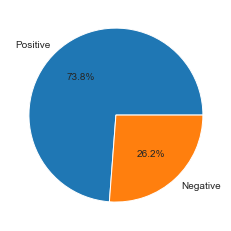

In [7]:
# data['Sentiment'] = data['Rating'].apply(rating_to_sentiment)
# data.dropna(inplace=True)
# data.reset_index(drop=True, inplace=True)

plt.pie(data['Sentiment'].value_counts(), labels=["Positive", "Negative"], autopct='%1.1f%%')
plt.show()

In [8]:
data['Character Count'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Sentiment,Character Count
0,ok nothing special charge diamond member hilto...,2,Negative,1689
1,"unique, great stay, wonderful time hotel monac...",5,Positive,600
2,"great stay great stay, went seahawk game aweso...",5,Positive,1281
3,love monaco staff husband stayed hotel crazy w...,5,Positive,1002
4,"cozy stay rainy city, husband spent 7 nights m...",5,Positive,748
5,"hotel stayed hotel monaco cruise, rooms genero...",5,Positive,419
6,excellent stayed hotel monaco past w/e delight...,5,Positive,271
7,"poor value stayed monaco seattle july, nice ho...",2,Negative,333
8,horrible customer service hotel stay february ...,1,Negative,1411
9,disappointed say anticipating stay hotel monac...,2,Negative,1662


In [32]:
data['Character Count'].mean()

704.1934300619498

In [9]:
def word_counts(review):
    review_list = review.split()
    return len(review_list)

data['Word Count'] = data['Review'].apply(word_counts)
data.head(10)

,Review,Rating,Sentiment,Character Count,Word Count
0,ok nothing special charge diamond member hilto...,2,Negative,1689,250
1,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89
2,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191
3,love monaco staff husband stayed hotel crazy w...,5,Positive,1002,134
4,"cozy stay rainy city, husband spent 7 nights m...",5,Positive,748,101
5,"hotel stayed hotel monaco cruise, rooms genero...",5,Positive,419,59
6,excellent stayed hotel monaco past w/e delight...,5,Positive,271,35
7,"poor value stayed monaco seattle july, nice ho...",2,Negative,333,47
8,horrible customer service hotel stay february ...,1,Negative,1411,214
9,disappointed say anticipating stay hotel monac...,2,Negative,1662,242


In [34]:
data['Word Count'].mean()

100.86525921095533

In [10]:
data['mean_word_length'] = data['Review'].map(lambda x: np.mean([len(word) for word in x.split()]))
data.head(10)

,Review,Rating,Sentiment,Character Count,Word Count,mean_word_length
0,ok nothing special charge diamond member hilto...,2,Negative,1689,250,5.752000
1,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89,5.730337
2,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191,5.701571
3,love monaco staff husband stayed hotel crazy w...,5,Positive,1002,134,6.470149
4,"cozy stay rainy city, husband spent 7 nights m...",5,Positive,748,101,6.396040
5,"hotel stayed hotel monaco cruise, rooms genero...",5,Positive,419,59,6.084746
6,excellent stayed hotel monaco past w/e delight...,5,Positive,271,35,6.714286
7,"poor value stayed monaco seattle july, nice ho...",2,Negative,333,47,6.063830
8,horrible customer service hotel stay february ...,1,Negative,1411,214,5.588785
9,disappointed say anticipating stay hotel monac...,2,Negative,1662,242,5.863636


In [11]:
data['mean_sentence_length'] = data['Review'].map(lambda x: np.mean([len(sent) for sent in tokenize.sent_tokenize(x)]))
data.head(10)

,Review,Rating,Sentiment,Character Count,Word Count,mean_word_length,mean_sentence_length
0,ok nothing special charge diamond member hilto...,2,Negative,1689,250,5.752000,1687.0
1,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89,5.730337,598.0
2,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191,5.701571,1279.0
3,love monaco staff husband stayed hotel crazy w...,5,Positive,1002,134,6.470149,1000.0
4,"cozy stay rainy city, husband spent 7 nights m...",5,Positive,748,101,6.396040,746.0
5,"hotel stayed hotel monaco cruise, rooms genero...",5,Positive,419,59,6.084746,417.0
6,excellent stayed hotel monaco past w/e delight...,5,Positive,271,35,6.714286,269.0
7,"poor value stayed monaco seattle july, nice ho...",2,Negative,333,47,6.063830,331.0
8,horrible customer service hotel stay february ...,1,Negative,1411,214,5.588785,1409.0
9,disappointed say anticipating stay hotel monac...,2,Negative,1662,242,5.863636,1660.0


In [36]:
data['mean_sentence_length'].mean()

693.034842157625

In [12]:
df_term_freq = data.copy()[["Review", "Sentiment"]]

df_term_freq.head()

,Review,Sentiment
0,ok nothing special charge diamond member hilto...,Negative
1,"unique, great stay, wonderful time hotel monac...",Positive
2,"great stay great stay, went seahawk game aweso...",Positive
3,love monaco staff husband stayed hotel crazy w...,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",Positive


In [13]:
# def clean(review):
    
#     review = review.lower()
#     review = re.sub('[^a-z A-Z 0-9-]+', '', review)
#     review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
#     return review

# df['Review'] = df['Review'].apply(clean)
# df.head(10)

In [14]:
def tokenize(sentence,method='spacy'):
# Tokenize and lemmatize text, remove stopwords and punctuation

    punctuations = string.punctuation
    stopwords = list(STOP_WORDS)

    if method=='nltk':
        # Tokenize
        tokens = nltk.word_tokenize(sentence,preserve_line=True)
        # Remove stopwords and punctuation
        tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
        # Lemmatize
        #wordnet_lemmatizer = WordNetLemmatizer()
        #tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
        tokens = " ".join([i for i in tokens])
    else:
        # Tokenize
        with nlp.select_pipes(enable=['tokenizer','lemmatizer']):
            tokens = nlp(sentence)
        # Lemmatize
        tokens = [word.lemma_.lower().strip() for word in tokens]
        # Remove stopwords and punctuation
        tokens = [word for word in tokens if word not in stopwords and word not in punctuations]
        tokens = " ".join([i for i in tokens])
    return tokens

In [15]:
# Process the reviews
tqdm.pandas()
df_term_freq['processed_reviews'] = df_term_freq['Review'].progress_apply(lambda x: tokenize(x,method='nltk'))

100%|██████████| 12268/12268 [00:09<00:00, 1239.80it/s]


In [16]:
df_term_freq

,Review,Sentiment,processed_reviews
0,ok nothing special charge diamond member hilto...,Negative,ok special charge diamond member hilton decide...
1,"unique, great stay, wonderful time hotel monac...",Positive,unique great stay wonderful time hotel monaco ...
2,"great stay great stay, went seahawk game aweso...",Positive,great stay great stay went seahawk game awesom...
3,love monaco staff husband stayed hotel crazy w...,Positive,love monaco staff husband stayed hotel crazy w...
4,"cozy stay rainy city, husband spent 7 nights m...",Positive,cozy stay rainy city husband spent 7 nights mo...
...,...,...,...
12263,not impressed unfriendly staff checked asked h...,Negative,impressed unfriendly staff checked asked highe...
12264,"best kept secret 3rd time staying charm, not 5...",Positive,best kept secret 3rd time staying charm 5-star...
12265,"ok just looks nice modern outside, desk staff ...",Negative,ok looks nice modern outside desk staff partic...
12266,hotel theft ruined vacation hotel opened sept ...,Negative,hotel theft ruined vacation hotel opened sept ...


In [17]:
def tokenize_reviews(text):
    text_list = text.split()
    return text_list

df_term_freq['review_tokens'] = df_term_freq['processed_reviews'].apply(tokenize_reviews)
df_term_freq.head()

,Review,Sentiment,processed_reviews,review_tokens
0,ok nothing special charge diamond member hilto...,Negative,ok special charge diamond member hilton decide...,"[ok, special, charge, diamond, member, hilton,..."
1,"unique, great stay, wonderful time hotel monac...",Positive,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
2,"great stay great stay, went seahawk game aweso...",Positive,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
3,love monaco staff husband stayed hotel crazy w...,Positive,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ..."
4,"cozy stay rainy city, husband spent 7 nights m...",Positive,cozy stay rainy city husband spent 7 nights mo...,"[cozy, stay, rainy, city, husband, spent, 7, n..."


In [18]:
corpus = []

for i in trange(df_term_freq.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df_term_freq['review_tokens'][i]
    
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12268/12268 [00:00<00:00, 216141.48it/s]


1171593

In [19]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 29605),
 ('room', 19659),
 ('great', 11905),
 ('staff', 10056),
 ('stay', 9399),
 ('good', 7805),
 ('rooms', 6906),
 ('stayed', 6317),
 ('service', 6170),
 ('nice', 5829)]

In [23]:
import pickle

with open('./data/most_common_unigram.pkl', 'wb') as f:
    pickle.dump(mostCommon, f)

with open('./data/most_common_unigram.pkl', 'rb') as f:
    mostCommon = pickle.load(f)

mostCommon

[('hotel', 29605),
 ('room', 19659),
 ('great', 11905),
 ('staff', 10056),
 ('stay', 9399),
 ('good', 7805),
 ('rooms', 6906),
 ('stayed', 6317),
 ('service', 6170),
 ('nice', 5829)]

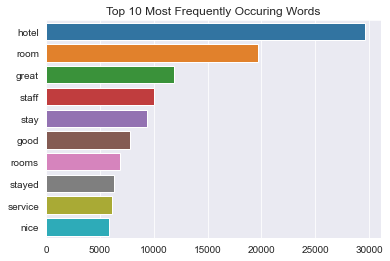

In [24]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [25]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_term_freq['processed_reviews'])

In [26]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [28]:
ngram_freq = ngram_freq[:10]
ngram_freq

,frequency,ngram
0,1208,staff friendly
1,1120,great location
2,983,great hotel
3,955,punta cana
4,938,recommend hotel
5,872,hotel great
6,831,friendly helpful
7,805,walking distance
8,794,hotel staff
9,758,highly recommend


In [30]:
ngram_freq.to_pickle('./data/most_common_bigram.pkl')

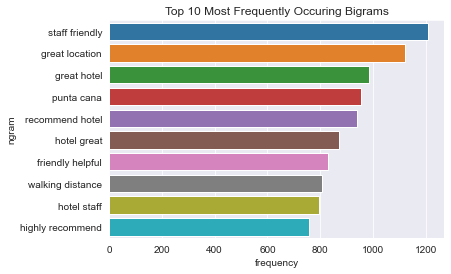

In [29]:
sns.barplot(x=ngram_freq['frequency'], y=ngram_freq['ngram'])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [23]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_term_freq['processed_reviews'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

MemoryError: Unable to allocate 273. GiB for an array with shape (20491, 1786753) and data type int64

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

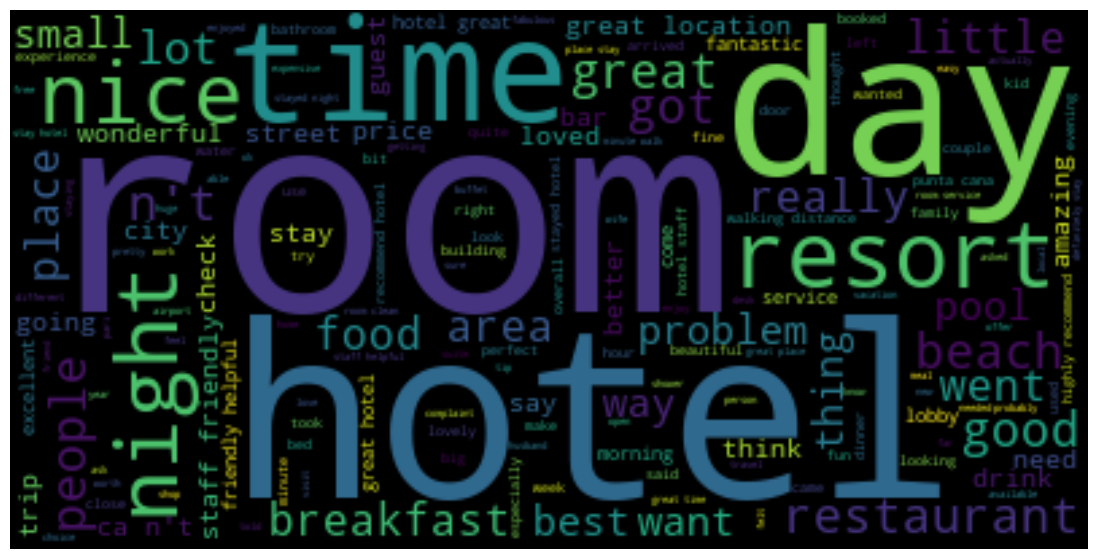

In [24]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string

text =''
for i in data[data['Sentiment']=='Positive']['Review'].values:
    text+=i + ' '

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

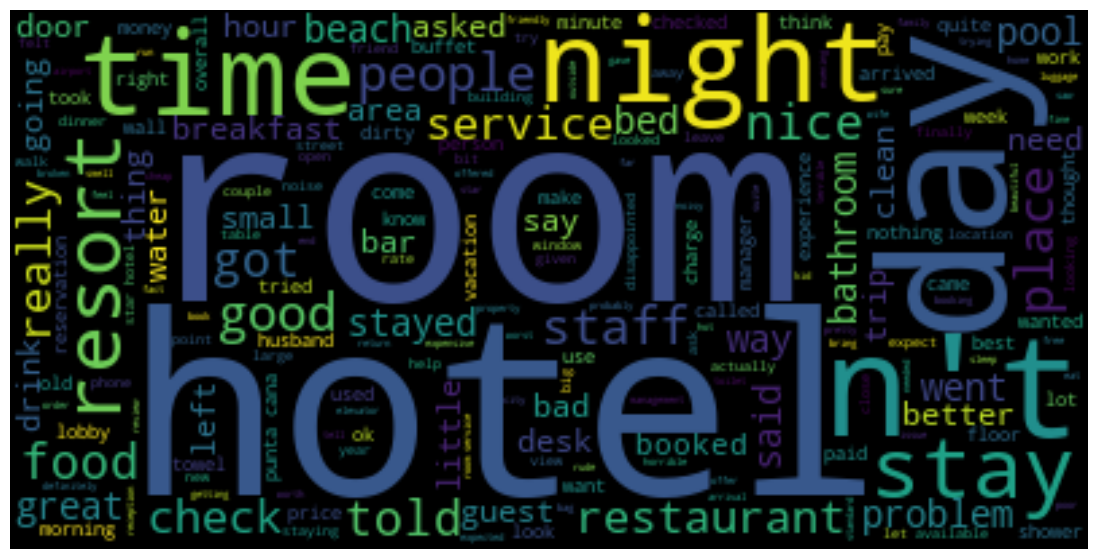

In [25]:
# Getting all the reviews termed Negative in a single string and forming a word cloud of the string

text =''
for i in data[data['Sentiment']=='Negative']['Review'].values:
    text+=i + ' '

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Getting all the reviews termed Neutral in a single string and forming a word cloud of the string

text =''
for i in data[data['Sentiment']=='Neutral']['Review'].values:
    text+=i + ' '

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
## NER

df_NER = data.copy()[["Review", "Sentiment"]]

df_NER.head()

In [ ]:
def process_NER(text):
    
    # Tokenize & NER
    with nlp.select_pipes(enable=['tokenizer','ner']):
        tokens = nlp(text)
    
    ner_results = [(entity.text, entity.label_) for entity in tokens.ents]
    
    return ner_results

In [ ]:
# Process the reviews
tqdm.pandas()
df_NER['NER'] = df_NER['Review'].progress_apply(lambda x: process_NER(x))

In [ ]:
df_NER

In [ ]:
df_NER.to_csv("NER_dataset.csv")